In [131]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
iris_data = datasets.load_iris()

In [24]:
diabetes_data = datasets.load_diabetes()

In [26]:
diabetes_data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [61]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [79]:
X_all =pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)

In [76]:
y = pd.DataFrame(diabetes_data.target,columns=['target'])

In [77]:
y.shape

(442, 1)

In [80]:
X_all.shape

(442, 10)

In [81]:
X_all.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [82]:
y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [85]:
X_all.bmi

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64

In [87]:
reg = LinearRegression().fit(X_all[['bmi']],y)

In [94]:
prediction_space = np.linspace(min(X_all.bmi),max(X_all.bmi)).reshape(-1, 1)

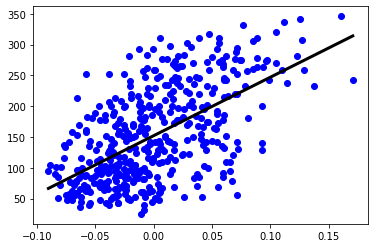

In [100]:
plt.scatter(X_all.bmi,y,color='blue')
plt.plot(prediction_space,reg.predict(prediction_space),color='black',linewidth=3)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_all,y,test_size=0.4,random_state=42)

In [103]:
reg_all = LinearRegression().fit(X_train,y_train)

In [104]:
y_pred = reg_all.predict(X_test)

In [105]:
reg_all.score(X_test,y_test)

0.5157444756897698

In [106]:
regCV = LinearRegression()

In [120]:
cv_results = cross_val_score(regCV,X_train,y_train,cv=3)

In [121]:
print(cv_results)

[0.37567746 0.52884361 0.39874992]


In [122]:
np.mean(cv_results)

0.434423659227607

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_all,y,test_size=0.3,random_state=42)
ridge = Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test,y_test)

0.47984556196949774

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_all,y,test_size=0.3,random_state=42)
lasso = Lasso(alpha=0.1,normalize=True)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test,y_test)

0.48630937832042037

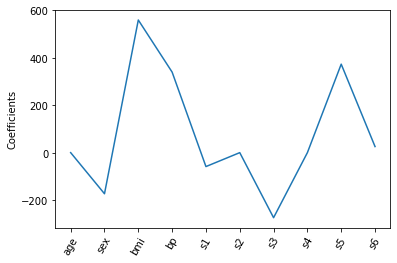

In [134]:
names = X_train.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X_train, y_train).coef_
_= plt.plot(range(len(names)), lasso_coef)
_= plt.xticks(range(len(names)), names, rotation=60)
_= plt.ylabel('Coefficients')
plt.show()